# Proof of concept (WIP)

This notebook will serve as a document that outlines proof that various components of my analysis scripts

## General tools for analysis in `tools.py`

In [1]:
import tools

#### Tracks loader

Tracks loader takes a path and returns the ordered tracking data for two populations of cells (i.e. wild-type and scr-kd):

`wt_cells, scr_cells, all_cells = tools.load_tracking_data('path/to/.hdf5')`

The wild-type cells will have positive integer IDs and the mutant population will have negative integer IDs.

In [2]:
wt_cells, scr_cells, all_cells = tools.load_tracking_data('/home/nathan/data/kraken/h2b/giulia/GV0807/Pos3/Pos3_aligned/HDF/segmented.hdf5')

[INFO][2021/04/30 05:59:19 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0807/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/30 05:59:19 PM] Loading tracks/obj_type_1


Btrack version no.: 0.4.0


[INFO][2021/04/30 05:59:22 PM] Loading objects/obj_type_1 (408973, 5) (388394 filtered: area>=100)
[INFO][2021/04/30 05:59:26 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0807/Pos3/Pos3_aligned/HDF/segmented.hdf5
[INFO][2021/04/30 05:59:26 PM] Opening HDF file: /home/nathan/data/kraken/h2b/giulia/GV0807/Pos3/Pos3_aligned/HDF/segmented.hdf5...
[INFO][2021/04/30 05:59:26 PM] Loading tracks/obj_type_2
[INFO][2021/04/30 05:59:26 PM] Loading objects/obj_type_2 (12115, 5) (8894 filtered: area>=100)
[INFO][2021/04/30 05:59:26 PM] Closing HDF file: /home/nathan/data/kraken/h2b/giulia/GV0807/Pos3/Pos3_aligned/HDF/segmented.hdf5


Track information loaded and ordered according to cell type (WT IDs >0> Scr IDs)


#### Single cell selector 

Select target cell takes a cell ID and variable containing a population of loaded cells from previous function and returns the corresponding mutant cell by default, or the wild-type if specified. 

For example, a mutant target cell with ID 17:

`target_mutant_cell = tools.select_target_cell(17, all_cells)`

and a wild-type target cell with ID 24:

`target_wildtype_cell = tools.select_target_cell(24, all_cells, 'WT')`

In [3]:
target_cell = tools.select_target_cell(17, all_cells)#, 'WT')

#### Focal time selector

`apoptosis_time(target_cell)` will try and find an apoptosis (defined as three sequential apoptosis classifications from the btrack information) time point. 


In [4]:
tools.apoptosis_time(target_cell)

730


`random_time(target_cell)` will return a random time point in the target cells existence, useful for generating control plots in the latter analysis.

In [5]:
tools.random_time(target_cell)

421

#### Euclidean Distance calculator

An important function that calculates the pixel distance between two cells at a given frame in the timelapse microscope movie. If the cell has gone through an apoptosis, it's location will be returned as the apoptosis location. If the cell does not exist at that frame then a `np.inf` distance will be returned.

`euc_dist(target_cell, other_cell, frame, focal_time)`

In [6]:
focal_time = tools.apoptosis_time(target_cell)
other_cell = tools.select_target_cell(33, all_cells, 'WT')

In [14]:
tools.euc_dist(target_cell, other_cell, 400, focal_time)

876.4501222724415

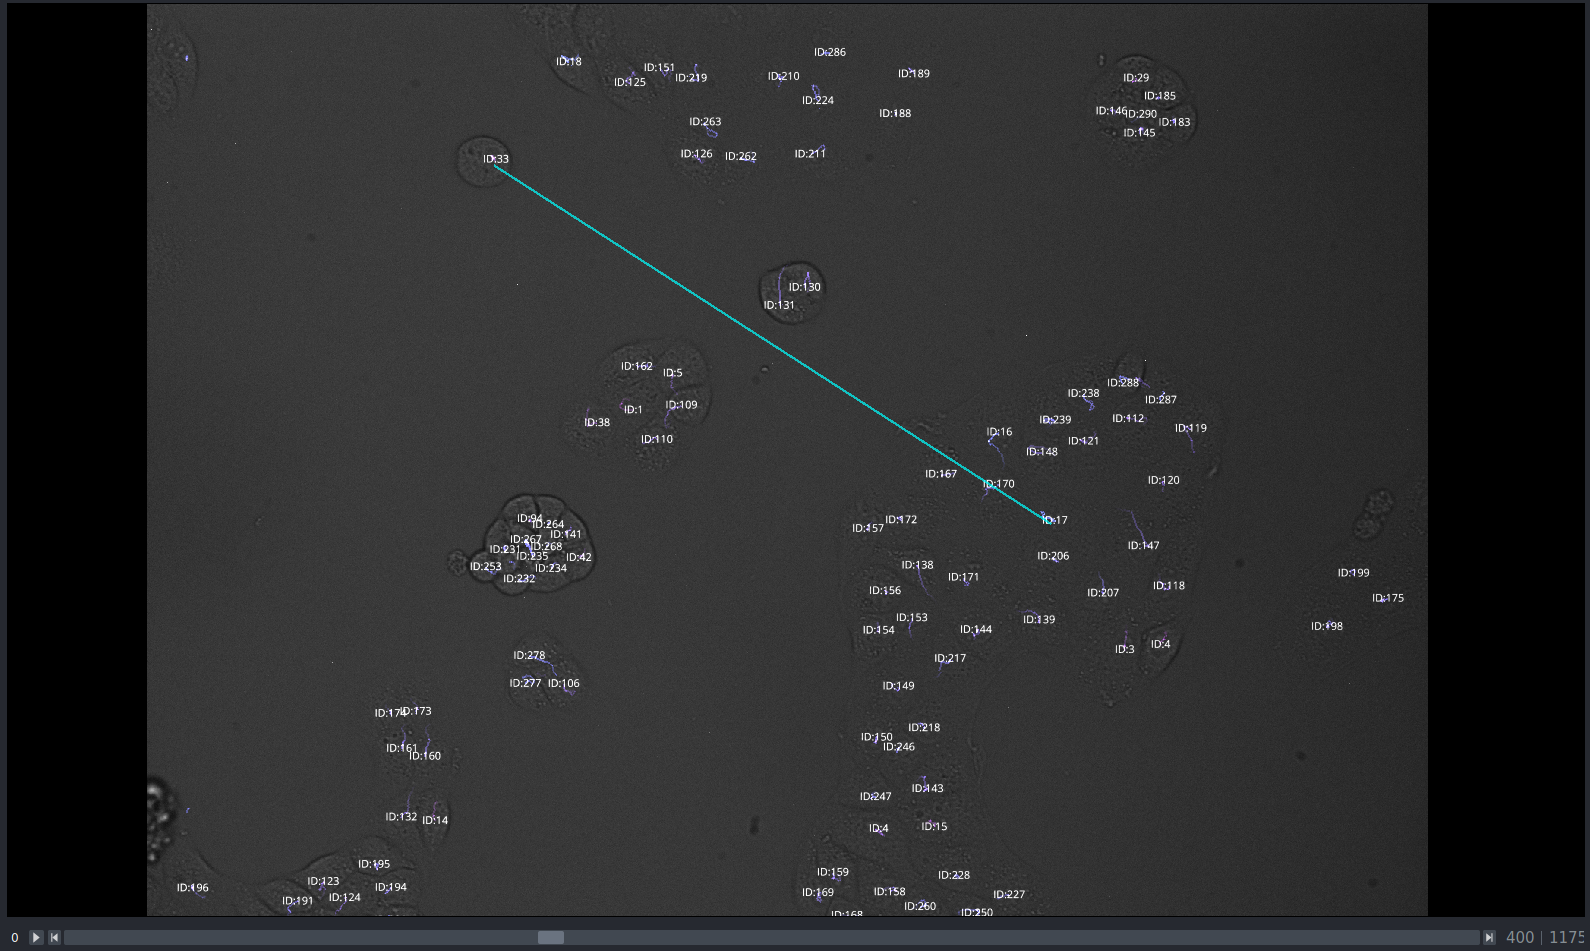
This image shows the distance of approx 876 pixels between the two specified cells at a specific frame in a field of view of 1200,1600 pixels.

The target cell (Scr 17) does not exist in the 1st frame of the movie

In [12]:
tools.euc_dist(target_cell, other_cell, 0, focal_time)

inf

#### Cell Counter

Takes a population of subject cells and a single target cell and counts the spatial and temporal distance between each subject cell and the target cell over a specified radius and time range centered around a focal time. 

`cell_counter(subject_cells, target_cell, radius, t_range, focal_time)`

This function returns a list of cell IDs, the euclidean distance between that cell ID and the target cell and the frame at which this distance was calculated.

In [20]:
tools.cell_counter(wt_cells, target_cell, 200, 200, focal_time)

[(316, 74.2, 630),
 (331, 170.88, 630),
 (335, 176.3, 630),
 (336, 38.08, 630),
 (352, 172.85, 630),
 (353, 55.0, 630),
 (367, 167.42, 630),
 (368, 111.21, 630),
 (381, 133.4, 630),
 (389, 194.8, 630),
 (399, 179.38, 630),
 (405, 170.36, 630),
 (407, 69.55, 630),
 (453, 167.93, 630),
 (454, 160.92, 630),
 (461, 193.64, 630),
 (535, 168.59, 630),
 (561, 191.83, 630),
 (587, 151.94, 630),
 (591, 159.86, 630),
 (603, 185.45, 630),
 (604, 79.38, 630),
 (649, 131.33, 630),
 (650, 120.44, 630),
 (657, 140.97, 630),
 (673, 105.99, 630),
 (674, 74.54, 630),
 (331, 169.74, 631),
 (335, 179.19, 631),
 (336, 37.75, 631),
 (352, 174.54, 631),
 (353, 59.19, 631),
 (367, 164.97, 631),
 (368, 112.41, 631),
 (381, 135.64, 631),
 (389, 196.8, 631),
 (399, 174.74, 631),
 (405, 167.34, 631),
 (407, 67.68, 631),
 (453, 167.74, 631),
 (454, 159.27, 631),
 (461, 195.38, 631),
 (535, 164.56, 631),
 (561, 192.92, 631),
 (587, 150.34, 631),
 (591, 155.93, 631),
 (603, 183.04, 631),
 (604, 77.42, 631),
 (649, 1

#### Event counter

Similar to the previous function, except this counts cellular events specified by an extra positional argument:

`event_counter(event, subject_cells, target_cell, radius, t_range, focal_time)`

Where event can either be a string input of `apoptosis` or `divide`.



In [30]:
tools.event_counter('divide', wt_cells, target_cell, 200, 200, focal_time)

[(157, 168.61, 663),
 (316, 74.2, 630),
 (331, 170.42, 672),
 (336, 53.22, 675),
 (352, 153.47, 691),
 (353, 56.98, 649),
 (367, 136.97, 648),
 (368, 100.07, 647),
 (399, 161.52, 691),
 (405, 165.87, 754),
 (407, 78.31, 703),
 (454, 166.6, 680),
 (535, 148.22, 738),
 (587, 131.75, 738),
 (591, 166.01, 754),
 (604, 120.48, 749),
 (650, 154.06, 798)]

Proof of these functions are included in the following link as multiple screenshots where the raw data is labelled with a scan radius and relevant cellular IDs are ticked off 

[Proof of cell and event counter](https://drive.google.com/drive/folders/1bF3_Dd7pAZmwaqeEKqM0AkZcdFNUusnB?usp=sharing)